In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
horse = pd.read_csv('horse_data.csv',sep=',',na_values='?',names=['surgery','Age','Hospital_Number','rectal_temperature','pulse','respiratory_rate',' temperature_of_extremities','peripheral_pulse','mucous_membranes','capillary_refill_time','pain','peristalsis','abdominal_distension','nasogastric_tube','nasogastric_reflux','nasogastric_reflux_PH','rectal_examination-feces','abdomen','packed_cell_volume','total_protein','abdominocentesis_appearance','abdomcentesis_total_protein','outcome','surgical_lesion','type_of_lesion1','type_of_lesion2','type_of_lesion3','cp_data'])

horse_stat = horse[['surgery','Age','Hospital_Number','rectal_temperature','pulse','capillary_refill_time','packed_cell_volume','outcome']]
# заполняем модой capillary_refill_time при 'outcome' == 1.0
horse1 = horse_stat[horse_stat['outcome'] == 1.0]
horse1_1 = horse1
horse1.capillary_refill_time.fillna(horse1_1.capillary_refill_time.mode()[0], inplace=True)
# заполняем модой capillary_refill_time при 'outcome' == 2.0 и сливаем таблицу с предыдущей
horse2 = horse_stat[horse_stat['outcome'] == 2.0]
horse2_1 = horse2
horse2.capillary_refill_time.fillna(horse2_1.capillary_refill_time.mode()[0], inplace=True)
horse1_2 = pd.concat([horse1,horse2], ignore_index=True)
# заполняем модой capillary_refill_time при 'outcome' == 3.0 и сливаем таблицу с предыдущей
horse3 = horse_stat[horse_stat['outcome'] == 3.0]
horse3_1 = horse3
horse3.capillary_refill_time.fillna(horse3_1.capillary_refill_time.mode()[0], inplace=True)
horse_stat = pd.concat([horse1_2,horse3], ignore_index=True)

horse_stat = horse_stat.dropna(axis='index', how='any', subset=['surgery'])
horse_stat = horse_stat.dropna(axis='index', how='any', subset=['outcome'])
#оказалось, что оба неопределенных значения находятся в одной строке
horse_st = horse_stat
horse_st.pulse.fillna(horse_stat.groupby('outcome').pulse.transform('mean'), inplace=True)
horse_st.packed_cell_volume.fillna(horse_stat.groupby('outcome').packed_cell_volume.transform('mean'), inplace=True)
horse_st.rectal_temperature.fillna(horse_stat.groupby('outcome').rectal_temperature.transform('mean'), inplace=True)
horse_st.head()

,surgery,Age,Hospital_Number,rectal_temperature,pulse,capillary_refill_time,packed_cell_volume,outcome
0,2.0,1,530334,38.300000,40.000000,1.0,33.000000,1.0
1,2.0,1,528355,38.190789,63.421687,1.0,42.727273,1.0
2,1.0,1,526802,37.900000,48.000000,1.0,37.000000,1.0
3,2.0,9,5299629,38.300000,90.000000,1.0,40.000000,1.0
4,1.0,1,528548,38.100000,66.000000,1.0,44.000000,1.0


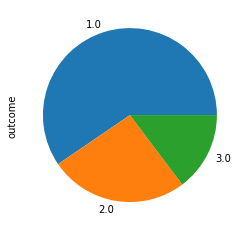

In [16]:
horse_outcome = horse_st.outcome.value_counts()
horse_outcome 
ax = horse_outcome.plot(kind='pie')

In [ ]:
Из диаграммы видно, что выживших лошадей больше чем суммарно умерших и усыпленных

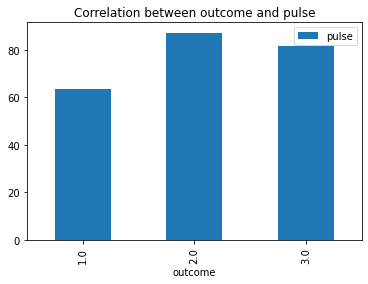

In [62]:
pulse_outcome = horse_st.groupby('outcome').mean()
pulse_outcome = pulse_outcome[[ 'pulse']]
pulse_outcome.plot( kind='bar', 
                    title='Correlation between outcome and pulse')
plt.show()

In [ ]:
Можно выдвинуть гипотезу, что выживали лошади у которых пульс учащался не очень сильно

In [69]:
pulse_outcome =horse_st[[ 'outcome','pulse']]
pulse_outcome.corr()

,outcome,pulse
outcome,1.000000,0.327069
pulse,0.327069,1.000000


In [ ]:
Но как показывает корреляция, зависимость между этими велечинами небольшая

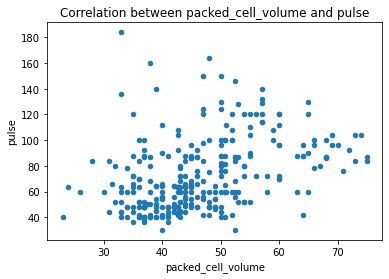

In [61]:

horse_st.plot(kind='scatter', 
        x='packed_cell_volume', 
        y='pulse', 
        title='Correlation between packed_cell_volume and pulse')
plt.show()

In [ ]:
Можно выдвинуть гипотезу, что при нормальном packed_cell_volume(от 30 до 50) пульс повышался не сильно

In [70]:
puls_packed =horse_st[[ 'packed_cell_volume','pulse']]
puls_packed.corr()

,packed_cell_volume,pulse
packed_cell_volume,1.000000,0.389848
pulse,0.389848,1.000000


In [ ]:
Но как показывает корреляция, зависимость между этими велечинами небольшая

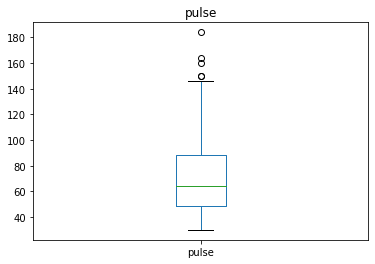

In [71]:
horse_st.pulse.plot(kind='box',
                   title='pulse')

In [ ]:
Из бокссплота видно, что у половины лошадей пульс находился в пределах от тридцати до шестидесяти 
с небольшим ударов/мин, у второй половины от шестидесяти с небольшим  до ста пядитесяти ударов/мин.
Есть 4 выброса превышающие 150 уд/мин